<a href="https://colab.research.google.com/github/CodingCat-Jung/SmartCity/blob/main/SmartCity03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

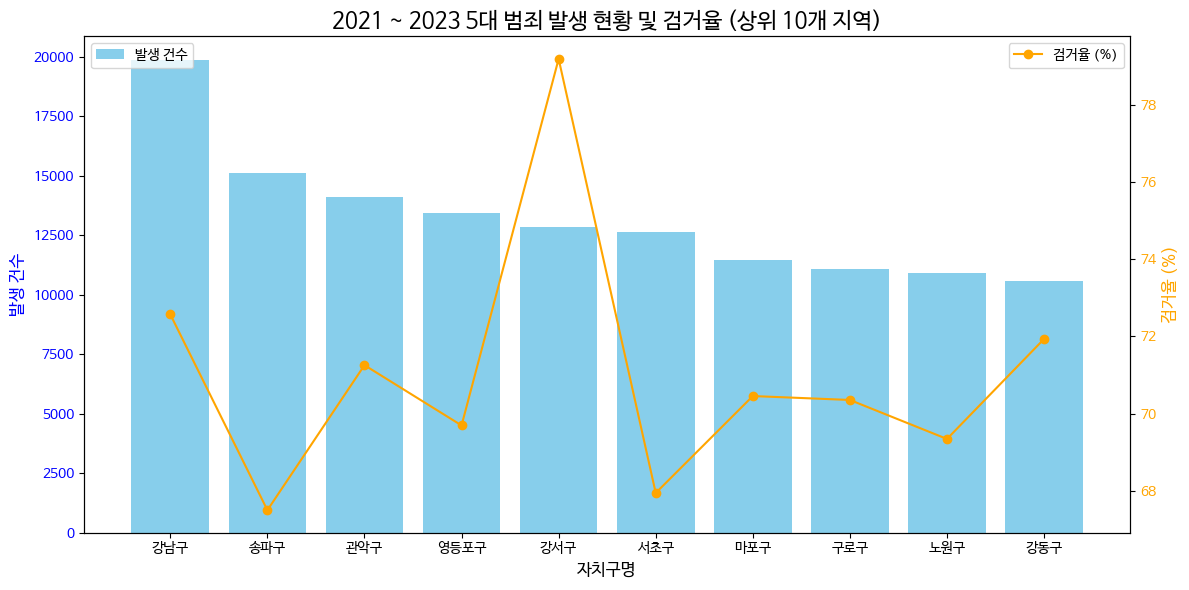

In [22]:
# 자치구별 5대 범죄 발생 현황 파악 / 검거율 파악

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df21 = pd.read_excel('2021 자치구별 범죄 발생 현황.xlsx')
df22 = pd.read_excel('2022 자치구별 범죄 발생 현황.xlsx')
df23 = pd.read_excel('2023 자치구별 범죄 발생 현황.xlsx')

df21 = df21[['자치구별(2)', '발생', '검거']]
df22 = df22[['자치구별(2)', '발생', '검거']]
df23 = df23[['자치구별(2)', '발생', '검거']]

# 데이터 병합
df_combined = pd.concat([df21, df22, df23])

# 발생 건수 합산 (자치구별 기준)
df_grouped = df_combined.groupby('자치구별(2)')[['발생', '검거']].sum().reset_index()

# 검거율 계산
df_grouped['검거율'] = (df_grouped['검거'] / df_grouped['발생']) * 100

# 발생 건수 기준으로 정렬
df_sorted = df_grouped.sort_values(by='발생', ascending=False)

# '소계' 행 제거
df_sorted = df_sorted[df_sorted['자치구별(2)'] != '소계']

# 결과를 새 엑셀 파일로 저장
df_sorted.to_excel('2021 ~ 2023 서울 5대 범죄 발생 현황 파악 결과.xlsx', index=False)

# 상위 10개 지역 추출
df_top10 = df_sorted.head(10)

plt.rc('font', family='NanumBarunGothic')

# 이중 축 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 발생 건수 (막대 그래프)
ax1.bar(df_top10['자치구별(2)'], df_top10['발생'], color='skyblue', label='발생 건수')
ax1.set_ylabel('발생 건수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('자치구명', fontsize=12)
ax1.legend(loc='upper left')

# 두 번째 Y축: 검거율 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(df_top10['자치구별(2)'], df_top10['검거율'], color='orange', marker='o', label='검거율 (%)')
ax2.set_ylabel('검거율 (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# 그래프 제목 및 레이아웃 설정
plt.title('2021 ~ 2023 5대 범죄 발생 현황 및 검거율 (상위 10개 지역)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# 그래프 출력
plt.show()

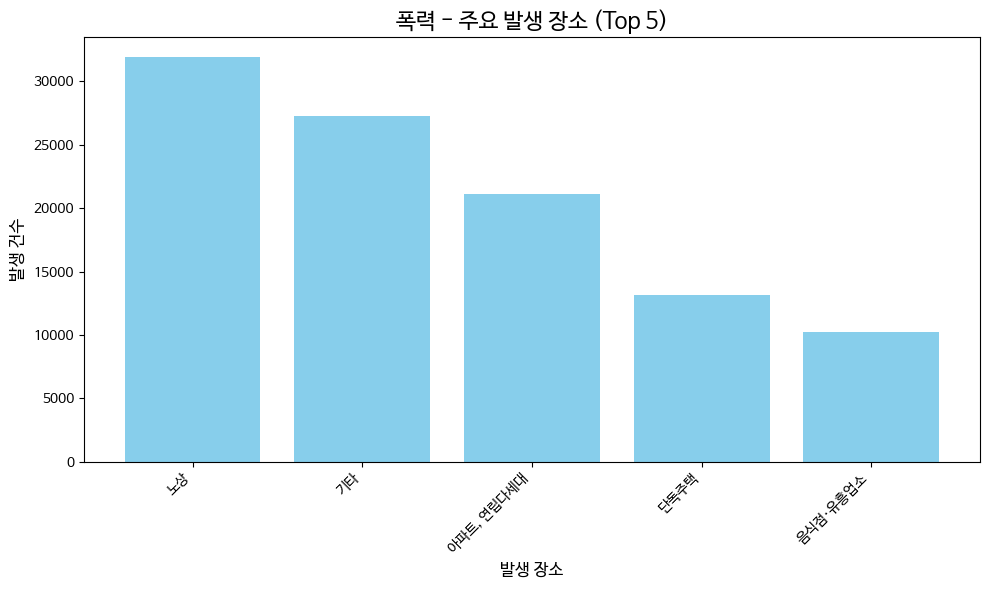

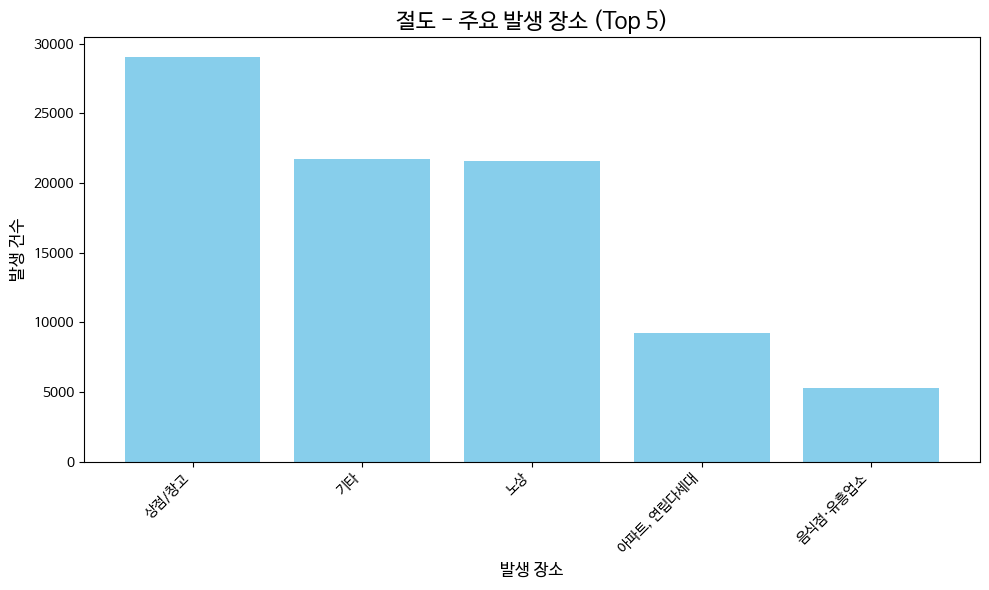

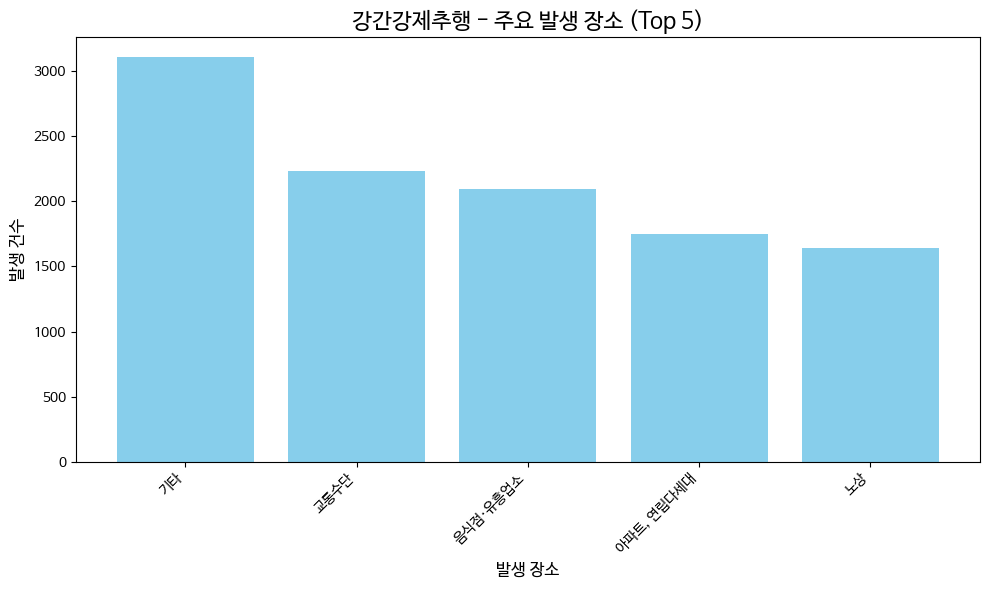

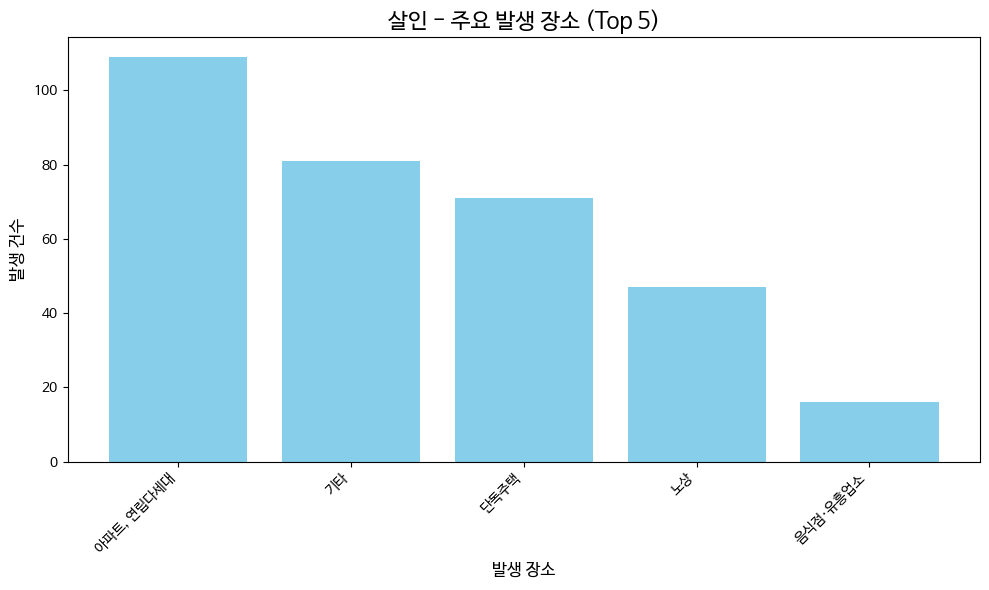

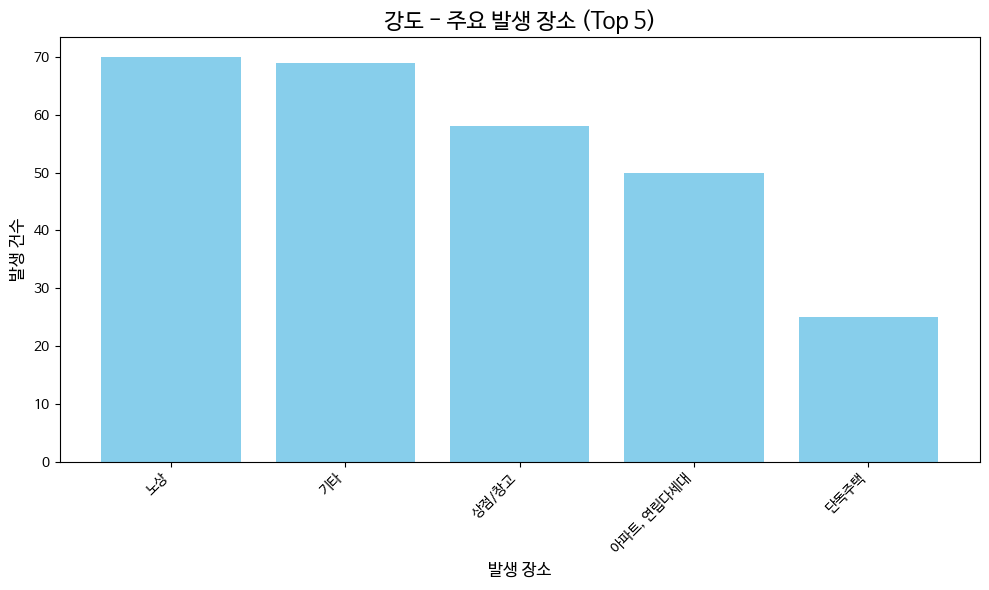

In [ ]:
# 범죄별 주 발생 장소 파악

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df21 = pd.read_excel('2021 서울 5대 범죄 발생장소.xlsx')
df22 = pd.read_excel('2022 서울 5대 범죄 발생장소.xlsx')
df23 = pd.read_excel('2023 서울 5대 범죄 발생장소.xlsx')

# 데이터 병합
df_combined = pd.concat([df21, df22, df23])

# '소계' 행 제거
df_combined = df_combined[df_combined['범죄별'] != '소계']

# 장소 관련 열 정의
location_columns = [
    '아파트, 연립다세대', '단독주택', '노상', '상점/창고', '공중위생업소(숙박업소, 목욕탕 등)',
    '음식점·유흥업소', '사무실', '역, 대합실', '교통수단', '문화/체육/오락시설',
    '학교/도서관/학원', '금융보험기관', '기타'
]

# 장소 관련 열 숫자로 변환 (변환 불가 시 0으로 처리)
for col in location_columns:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce').fillna(0).astype(int)

# 발생 장소 열을 단일 열로 변환
crime_location_stats = (
    df_combined.melt(id_vars=['범죄별'], value_vars=location_columns,
                     var_name='발생 장소', value_name='발생 건수')
    .groupby(['범죄별', '발생 장소'], as_index=False)['발생 건수']
    .sum()
    .sort_values(by='발생 건수', ascending=False)
)

# 결과를 새로운 엑셀 파일로 저장
output_file = '서울 5대 범죄별 주 발생 장소 분석 결과.xlsx'
crime_location_stats.to_excel(output_file, index=False)

plt.rc('font', family='NanumBarunGothic')

# 각 범죄 유형에 대해 시각화
for crime in crime_location_stats['범죄별'].unique():
    # 각 범죄별 주요 장소 상위 5개 추출
    crime_data = crime_location_stats[crime_location_stats['범죄별'] == crime].nlargest(5, '발생 건수')

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(crime_data['발생 장소'], crime_data['발생 건수'], color='skyblue')
    plt.title(f'{crime} - 주요 발생 장소 (Top 5)', fontsize=16)
    plt.xlabel('발생 장소', fontsize=12)
    plt.ylabel('발생 건수', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()


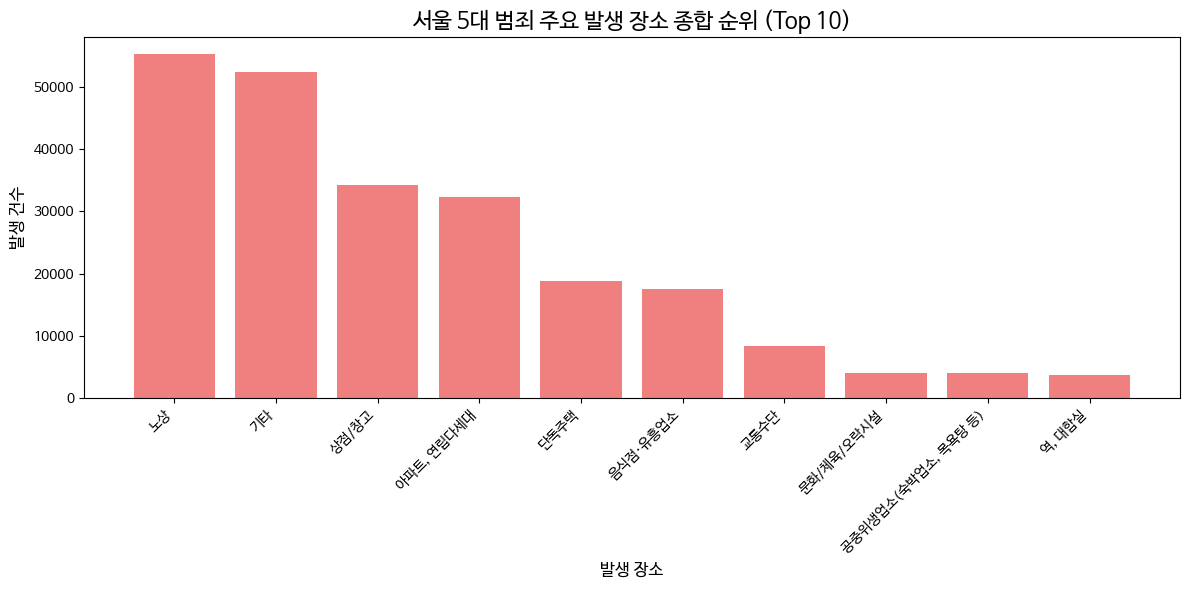

In [ ]:
# 서울 5대 범죄 주요 발생 장소 파악하기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df21 = pd.read_excel('2021 서울 5대 범죄 발생장소.xlsx')
df22 = pd.read_excel('2022 서울 5대 범죄 발생장소.xlsx')
df23 = pd.read_excel('2023 서울 5대 범죄 발생장소.xlsx')

# 데이터 병합
df_combined = pd.concat([df21, df22, df23])

# '소계' 행 제거
df_combined = df_combined[df_combined['범죄별'] != '소계']

# 장소 관련 열 정의
location_columns = [
    '아파트, 연립다세대', '단독주택', '노상', '상점/창고', '공중위생업소(숙박업소, 목욕탕 등)',
    '음식점·유흥업소', '사무실', '역, 대합실', '교통수단', '문화/체육/오락시설',
    '학교/도서관/학원', '금융보험기관', '기타'
]

# 장소 관련 열 숫자로 변환 (변환 불가 시 0으로 처리)
for col in location_columns:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce').fillna(0).astype(int)

# 발생 장소 열을 단일 열로 변환
crime_location_stats = (
    df_combined.melt(id_vars=['범죄별'], value_vars=location_columns,
                     var_name='발생 장소', value_name='발생 건수')
    .groupby(['범죄별', '발생 장소'], as_index=False)['발생 건수']
    .sum()
    .sort_values(by='발생 건수', ascending=False)
)

# 주요 장소를 종합해 합산
overall_top_locations = (
    crime_location_stats.groupby('발생 장소', as_index=False)['발생 건수']
    .sum()
    .sort_values(by='발생 건수', ascending=False)
)

# 결과를 새 엑셀 파일로 저장
output_file = '서울 5대 범죄 주요 발생 장소 종합 순위.xlsx'
overall_top_locations.to_excel(output_file, index=False)

# 시각화
plt.rc('font', family='NanumBarunGothic')

# 종합 순위 상위 10개 시각화
plt.figure(figsize=(12, 6))
plt.bar(overall_top_locations['발생 장소'].head(10),
        overall_top_locations['발생 건수'].head(10),
        color='lightcoral')

plt.title('서울 5대 범죄 주요 발생 장소 종합 순위 (Top 10)', fontsize=16)
plt.xlabel('발생 장소', fontsize=12)
plt.ylabel('발생 건수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


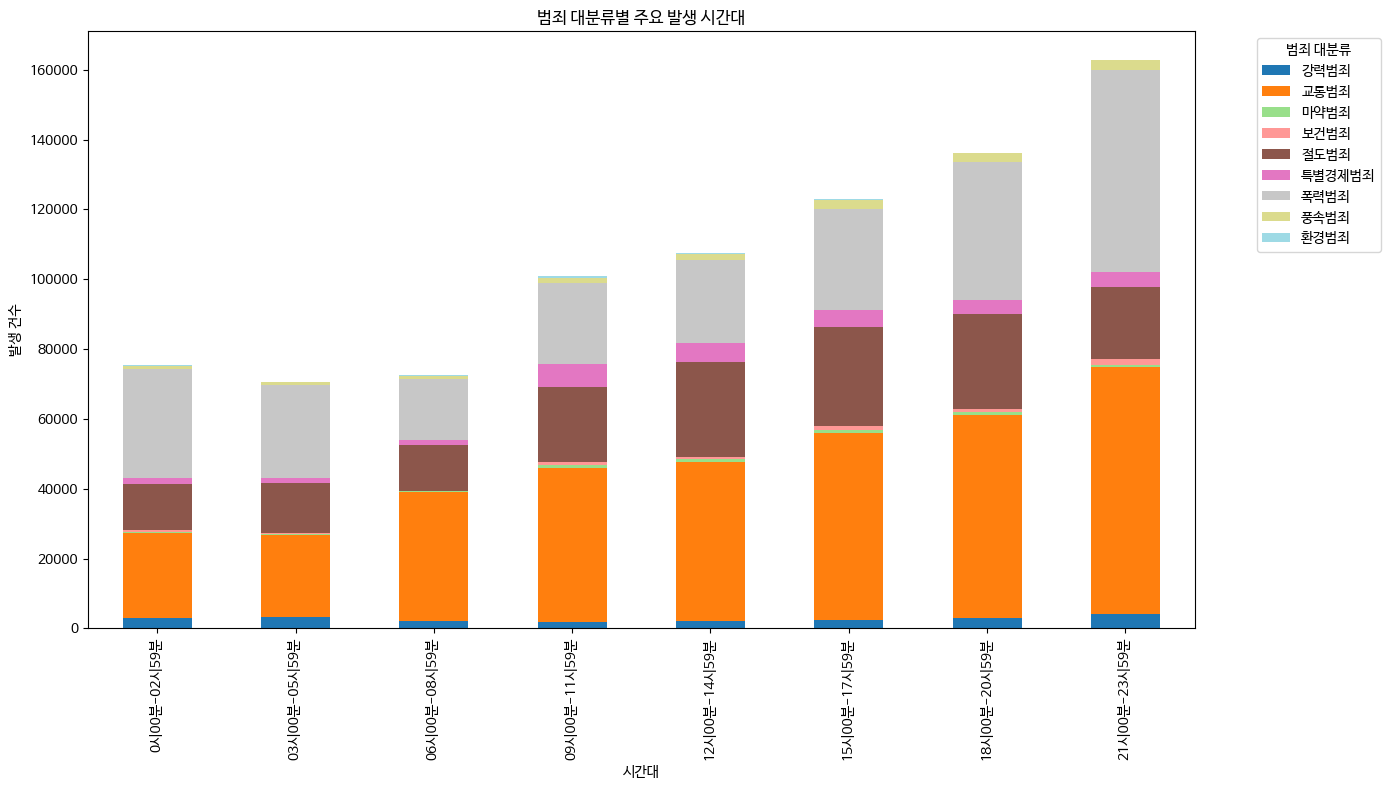

In [2]:
# 시간대별 범죄 발생 순위
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('경찰청_범죄 발생 시간대 및 요일_20191231.csv', encoding='cp949')

# 주요 시간대 열만 선택
time_columns = [
    '0시00분-02시59분', '03시00분-05시59분', '06시00분-08시59분',
    '09시00분-11시59분', '12시00분-14시59분', '15시00분-17시59분',
    '18시00분-20시59분', '21시00분-23시59분'
]

# 각 범죄 대분류별 주요 발생 시간대 합산
time_stats = df.groupby('범죄대분류')[time_columns].sum()

# 범죄 대분류별 주요 발생 시간대 순위 계산
time_stats_ranked = time_stats.apply(lambda x: x.sort_values(ascending=False).index.tolist(), axis=1)

# 결과 저장
time_stats.to_excel('범죄대분류_시간별_분석.xlsx')

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 시각화: 범죄 대분류별 주요 발생 시간대
time_stats.T.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='tab20')
plt.title('범죄 대분류별 주요 발생 시간대')
plt.xlabel('시간대')
plt.ylabel('발생 건수')
plt.legend(title='범죄 대분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

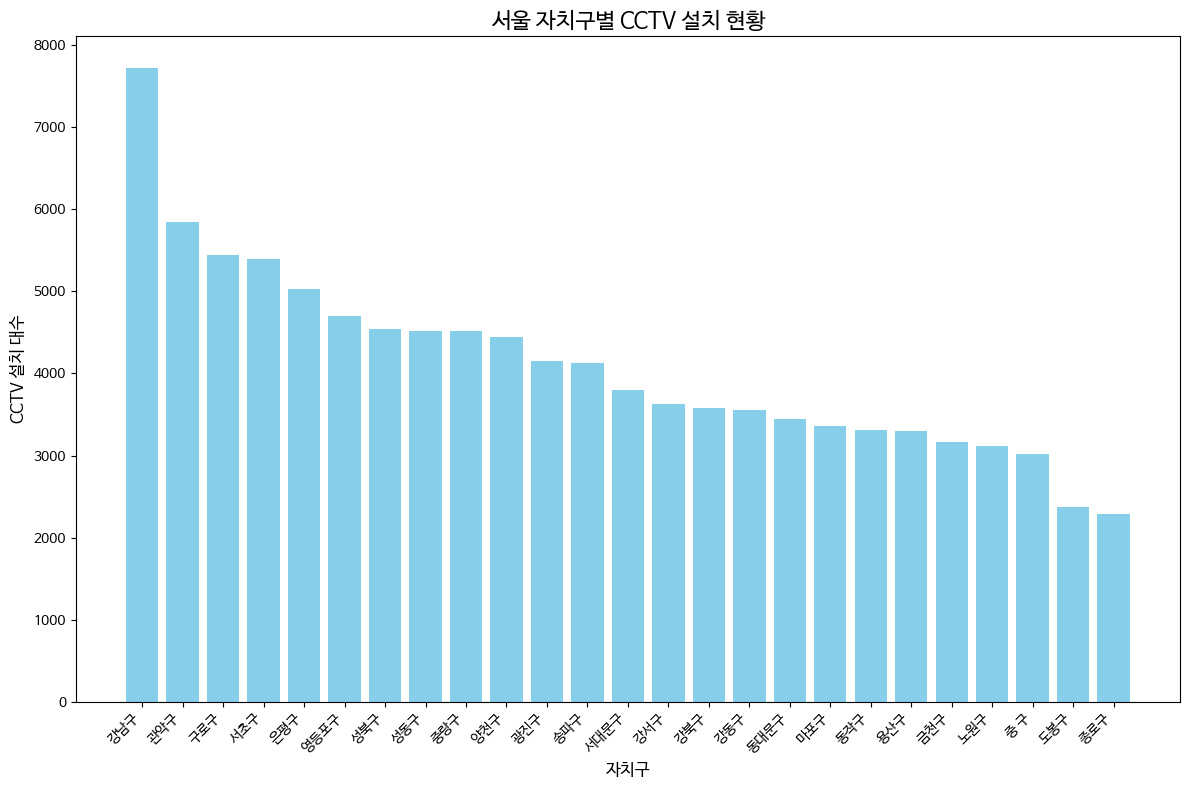

In [15]:
# 서울 자치구별 CCTV 설치율 파악하기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_excel('서울시 자치구 (연도별) CCTV 설치현황_240630.xlsx')

# print(df.columns)

df_sorted = df.sort_values(by='총계', ascending=False)

# 결과를 새 엑셀 파일로 저장
df_sorted.to_excel('서울 자치구별 CCTV 설치율 파악.xlsx', index=False)

plt.rc('font', family='NanumBarunGothic')

# 시각화: CCTV 설치율 (막대 그래프)
plt.figure(figsize=(12, 8))
plt.bar(df_sorted['구분'], df_sorted['총계'], color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title('서울 자치구별 CCTV 설치 현황', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('CCTV 설치 대수', fontsize=12)

# X축 라벨 회전
plt.xticks(rotation=45, ha='right', fontsize=10)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

상관계수:
                  발생       검거율  CCTV 설치 대수
발생          1.000000 -0.165364    0.689367
검거율        -0.165364  1.000000   -0.055595
CCTV 설치 대수  0.689367 -0.055595    1.000000


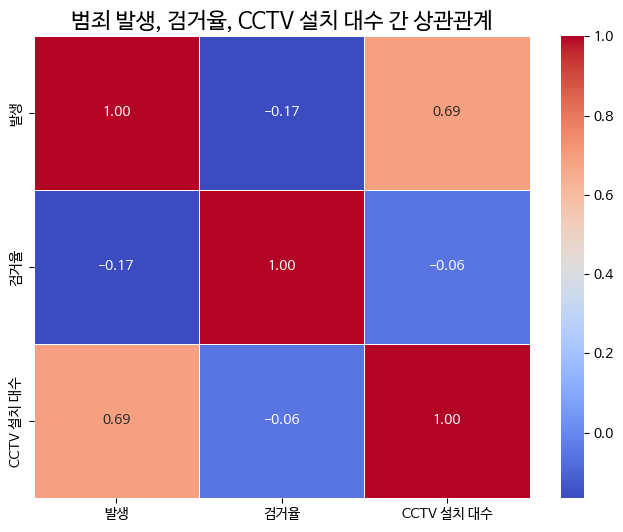

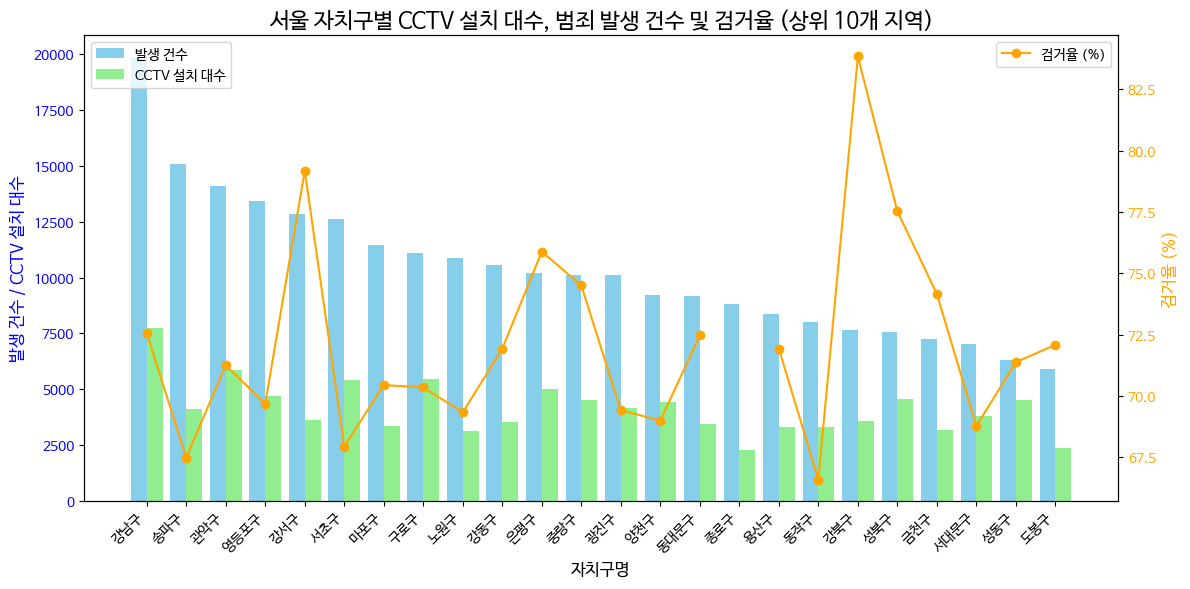

In [23]:
# CCTV 설치 대수가 범죄 발생 건수나 검거율에 어떤 영향을 미치는지 확인
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df_crime = pd.read_excel('2021 ~ 2023 서울 5대 범죄 발생 현황 파악 결과.xlsx')  # 자치구별 범죄 발생 현황
df_cctv = pd.read_excel('서울시 자치구 (연도별) CCTV 설치현황_240630.xlsx')  # 자치구별 CCTV 설치 현황

# CCTV 데이터에서 필요한 열 선택 (자치구명과 CCTV 설치 대수)
df_cctv = df_cctv[['구분', '총계']]
df_cctv.rename(columns={'구분': '자치구별(2)', '총계': 'CCTV 설치 대수'}, inplace=True)

# 두 데이터 병합
df_merged = pd.merge(df_crime, df_cctv, on='자치구별(2)', how='inner')

# 종로구 데이터에 이상을 감지 - 원본 데이터에 발생 건수보다 검거 횟수 데이터가 더 많게 종합되어 있음
df_merged.loc[df_merged['자치구별(2)'] == '종로구', '검거율'] = None

# 상관관계 분석
correlation_matrix = df_merged[['발생', '검거율', 'CCTV 설치 대수']].corr()

# 상관계수 출력
print("상관계수:")
print(correlation_matrix)

# 상관관계 시각화 (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('범죄 발생, 검거율, CCTV 설치 대수 간 상관관계', fontsize=16)
plt.show()


# 이중 축 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 발생 건수 (막대 그래프) 및 CCTV 설치 대수 (막대 그래프)
width = 0.4  # 막대 너비 설정
x = range(len(df_merged['자치구별(2)']))

# 발생 건수
ax1.bar([pos - width/2 for pos in x], df_merged['발생'], width=width, color='skyblue', label='발생 건수')

# CCTV 설치 대수
ax1.bar([pos + width/2 for pos in x], df_merged['CCTV 설치 대수'], width=width, color='lightgreen', label='CCTV 설치 대수')

ax1.set_ylabel('발생 건수 / CCTV 설치 대수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('자치구명', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(df_merged['자치구별(2)'], rotation=45, ha='right')
ax1.legend(loc='upper left')

# 두 번째 Y축: 검거율 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구별(2)'], df_merged['검거율'], color='orange', marker='o', label='검거율 (%)')
ax2.set_ylabel('검거율 (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# 그래프 제목 및 레이아웃 설정
plt.title('서울 자치구별 CCTV 설치 대수, 범죄 발생 건수 및 검거율 (상위 10개 지역)', fontsize=16)
plt.tight_layout()

# 그래프 출력
plt.show()
